- [DataShader Time Series Tutorial](https://datashader.org/user_guide/Timeseries.html)

In [ ]:
!pip install datashader

     |████████████████████████████████| 15.8MB 48.0MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 1.6MB 27.7MB/s 
     |████████████████████████████████| 675kB 40.3MB/s 
     |████████████████████████████████| 112kB 42.1MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=06abe1514603ac43b14f603710ce7a884f3979e70f657a179417f7f17ca24587
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.3.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.3.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
#import datetime
import pandas as pd
import numpy as np
#import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf
from collections import OrderedDict

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/IMU Error Research/Datasets/combined_IMU_data.csv"

In [ ]:
cols = ["Sensor", "Laser"]

In [ ]:
realdf = pd.read_csv(path)
realdf.tail()

,Unnamed: 0,Sensor,Laser
135788776,135788776,7184.0,26308.0
135788777,135788777,7148.0,26240.0
135788778,135788778,7184.0,26332.0
135788779,135788779,7148.0,26356.0
135788780,135788780,7184.0,26308.0


In [ ]:
realdf.columns = ["Time", "Sensor", "Laser"]

In [ ]:
realdf.tail()

,Time,Sensor,Laser
135788776,135788776,7184.0,26308.0
135788777,135788777,7148.0,26240.0
135788778,135788778,7184.0,26332.0
135788779,135788779,7148.0,26356.0
135788780,135788780,7184.0,26308.0


In [ ]:
#check for int64
type(realdf["Time"].iloc[0])

numpy.int64

In [ ]:
x_range = (realdf.iloc[0].Time, realdf.iloc[-1].Time)
y_range = (0.8*realdf.Sensor.min(), 1.2*realdf.Sensor.max())

print("x_range: {0} y_range: {1}".format(x_range,y_range))

x_range: (0.0, 135788780.0) y_range: (5648.0, 16718.399999999998)


In [ ]:
cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=300, plot_width=900)
aggs= OrderedDict((c, cvs.line(realdf, 'Time', c)) for c in cols)
img = tf.shade(aggs["Sensor"])

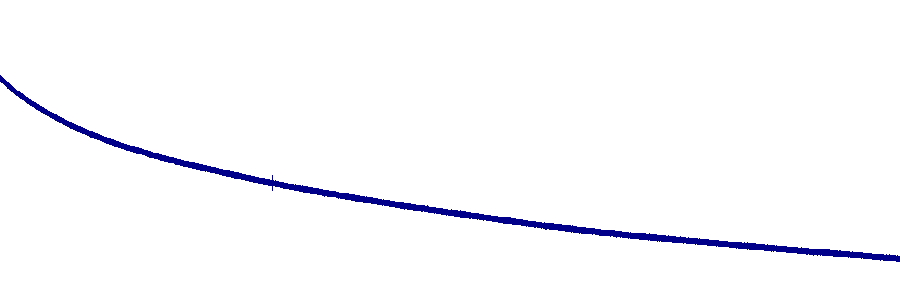

In [ ]:
img